In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
data_directory = "~/nuBoot/NUCHI201811DATA2/Homework/05-Matplotlib/Instructions/Pymaceuticals/"
# File to Load (Remember to Change These)
mouse_drug_data_to_load = data_directory + "data/mouse_drug_data.csv" # 
clinical_trial_data_to_load = data_directory +"data/clinicaltrial_data.csv"


In [2]:
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clin_tr = pd.read_csv(clinical_trial_data_to_load) 

In [3]:
clin_tr.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [4]:
#unblind study here?
unify= pd.merge(clin_tr,mouse_drug,on=['Mouse ID','Mouse ID'],how = 'left')

In [5]:
#check if there are non drugged meces besides the placebo drugs
drugs = unify['Drug'].unique()
#yup all accounted for 
drugs

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [6]:
time = unify['Timepoint'].unique()
time

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [7]:
def color_switch(argument):
    switcher = {
        'Capomulin': "blue",
        'Ramicane': "red",
        'Stelasyn': "green",
        'Ketapril': "yellow",
        'Naftisol': "cyan",
        'Zoniferol': "purple",
        'Placebo': "black",
        'Ceftamin': "navy",
        'Infubinol': "lime",
        'Propriva': "deeppink",
       
    }
    return switcher.get(argument, "nothing") 

In [8]:
unify['color']=[color_switch(d) for d in unify['Drug'] ] #lets define some colors
unify['color'].unique()

array(['blue', 'yellow', 'cyan', 'lime', 'green', 'red', 'deeppink',
       'purple', 'black', 'navy'], dtype=object)

(20, 100)

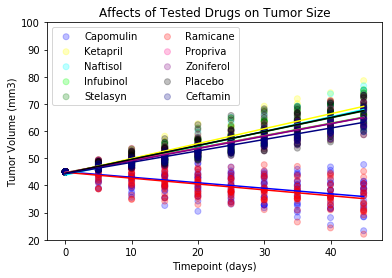

In [9]:
p = plt.subplots()
reg =[]
for drug in drugs:
    drug_data = unify.loc[unify['Drug']==drug]
    cur_reg = linregress(drug_data['Timepoint'],drug_data['Tumor Volume (mm3)'])
    #reg.update({drug,[cur_reg[0],cur_reg[1],cur_reg[3]]})
    reg.append(cur_reg)
    p[1].scatter(drug_data['Timepoint'],drug_data['Tumor Volume (mm3)'],c=drug_data['color'],alpha=.25,label=drug)
    p[1].plot(time,cur_reg[0]*time+cur_reg[1],c=color_switch(drug),label=None)
plt.title('Affects of Tested Drugs on Tumor Size')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='upper left', fancybox=True,ncol = 2)
plt.ylim(20,100)


In [10]:
d= dict(zip(drugs,reg))
slope_df = pd.DataFrame(d,index=['slope','intercept','rvalue','p-value','stderr'])
slope_df = slope_df.T
slope_df['slope'] = round(slope_df['slope'],3) 
slope_df['intercept'] = round(slope_df['intercept'],1)
slope_df['rvalue'] = round(slope_df['rvalue'],2)
slope_df['stderr'] = round(slope_df['stderr'],4)
slope_df = slope_df.sort_values('slope',ascending=True)
print('Linear Regression Models for tumor size response to various drugs from greatest decrease in size to greastest increase')
slope_df


Linear Regression Models for tumor size response to various drugs from greatest decrease in size to greastest increase


,slope,intercept,rvalue,p-value,stderr
Ramicane,-0.215,44.8,-0.63,5.596071e-27,0.0175
Capomulin,-0.203,45.1,-0.58,1.893468e-22,0.0187
Ceftamin,0.420,44.3,0.96,3.093787e-97,0.0095
Propriva,0.452,44.7,0.94,1.624685e-73,0.0136
Infubinol,0.454,44.7,0.95,2.149925e-89,0.0115
Zoniferol,0.457,44.4,0.94,1.036206e-88,0.0119
Stelasyn,0.509,44.5,0.92,3.253601e-80,0.0156
Placebo,0.513,44.5,0.91,1.345935e-70,0.0174
Naftisol,0.535,43.8,0.93,1.087699e-83,0.0152
Ketapril,0.548,44.4,0.93,4.633240e-82,0.0160


In [11]:
count_g = unify.groupby(['Drug','Timepoint'])
mean_vol_by_drug =count_g['Tumor Volume (mm3)'].mean()
sem_vol_by_drug = count_g['Tumor Volume (mm3)'].std()
count_by_drug = count_g['Tumor Volume (mm3)'].count()


(30, 80)

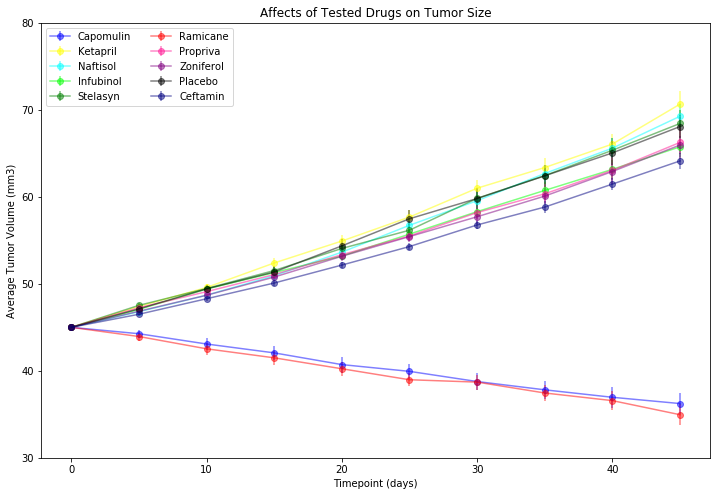

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
#plt.figure(figsize=(30, 16), dpi= 80, facecolor='w', edgecolor='k')
for drug in drugs:
    ax.errorbar(time,mean_vol_by_drug[drug],yerr=(sem_vol_by_drug[drug]/np.sqrt(count_by_drug[drug])),c=color_switch(drug),label=drug,marker = 'o',alpha=.5)

ax.legend(loc='upper left',ncol =2)

plt.title('Affects of Tested Drugs on Tumor Size')
plt.xlabel('Timepoint (days)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend(loc='upper left', fancybox=True,ncol = 2)
plt.ylim(30,80)


In [13]:
mean_sites_by_drug = count_g['Metastatic Sites'].mean()
sem_sites_by_drug = count_g['Metastatic Sites'].std()

In [14]:
#p = plt.subplots()
reg_ms =[]
for drug in drugs:
    drug_data = unify.loc[unify['Drug']==drug]
    cur_reg = linregress(drug_data['Timepoint'],drug_data['Metastatic Sites'])
    #reg.update({drug,[cur_reg[0],cur_reg[1],cur_reg[3]]})
    reg_ms.append(cur_reg)
#   Scatter plot of site data not as useful here
#    p[1].scatter(drug_data['Timepoint'],drug_data['Metastatic Sites'],c=drug_data['color'],alpha=.25,label=drug)
#    p[1].plot(time,cur_reg[0]*time+cur_reg[1],c=color_switch(drug),label=None)


In [15]:
d_ms= dict(zip(drugs,reg_ms))
slop_df_ms = pd.DataFrame(d_ms,index=['slope','intercept','rvalue','p-value','stderr'])
slop_df_ms = slop_df_ms.T
slop_df_ms['slope'] = round(slop_df_ms['slope'],3) 
slop_df_ms['intercept'] = round(slop_df_ms['intercept'],3)
slop_df_ms['rvalue'] = round(slop_df_ms['rvalue'],2)
slop_df_ms['stderr'] = round(slop_df_ms['stderr'],4)
slop_df_ms = slop_df_ms.sort_values('slope',ascending=True)
print('Linear Regression Models for metastatics sires for various drugs from least increase to greatest')
slop_df_ms


Linear Regression Models for metastatics sires for various drugs from least increase to greatest


,slope,intercept,rvalue,p-value,stderr
Ramicane,0.028,-0.052,0.58,8.440043e-22,0.0026
Capomulin,0.034,-0.030,0.58,1.998334e-22,0.0032
Stelasyn,0.041,0.078,0.58,3.638200e-19,0.0041
Infubinol,0.048,0.083,0.63,2.237003e-21,0.0044
Ceftamin,0.060,0.002,0.72,1.257468e-29,0.0043
Propriva,0.061,-0.057,0.76,1.122276e-31,0.0041
Naftisol,0.062,-0.036,0.72,1.493359e-31,0.0044
Ketapril,0.071,-0.100,0.71,1.275540e-30,0.0051
Zoniferol,0.071,-0.138,0.81,2.582528e-44,0.0038
Placebo,0.075,0.041,0.78,4.691822e-38,0.0045


(-0.25, 4)

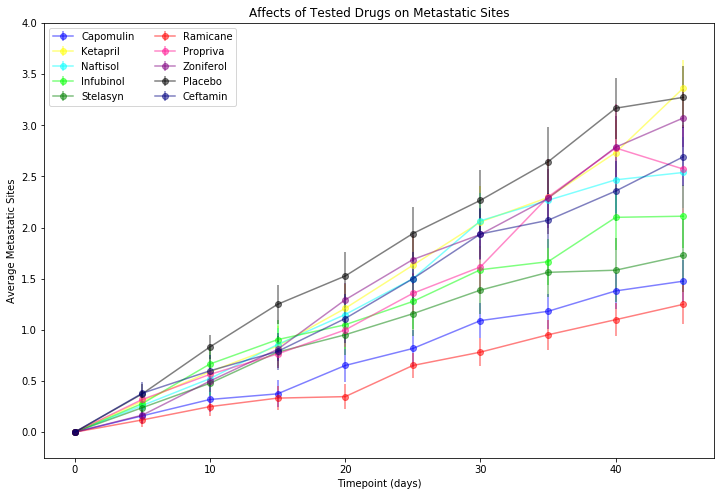

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
#plt.figure(figsize=(30, 16), dpi= 80, facecolor='w', edgecolor='k')
for drug in drugs:
    ax.errorbar(time,mean_sites_by_drug[drug],yerr=(sem_sites_by_drug[drug]/np.sqrt(count_by_drug[drug])),c=color_switch(drug),label=drug,marker = 'o',alpha=.5)

ax.legend(loc='upper left',ncol =2)


plt.legend(loc='upper left',ncol =2)

plt.title('Affects of Tested Drugs on Metastatic Sites')
plt.xlabel('Timepoint (days)')
plt.ylabel('Average Metastatic Sites')
plt.legend(loc='upper left', fancybox=True,ncol = 2)
plt.ylim(-0.25,4)


In [17]:
#Counting errors and fractions
def count_frac_err(n,d):
    err_n = np.sqrt(n)
    err_d = np.sqrt(d)
    return np.sqrt(pow(err_n/n,2) + pow(err_d/d,2))*n
      

(0, 110)

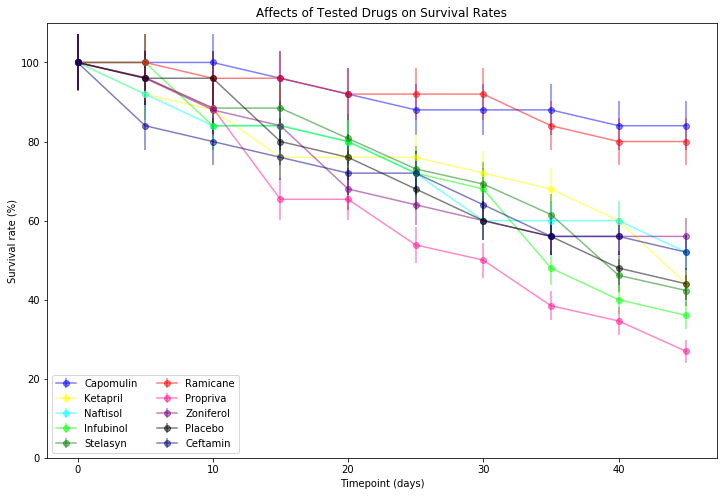

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
#.figure(figsize=(30, 16), dpi= 80, facecolor='w', edgecolor='k')
for drug in drugs:
    ax.errorbar(time,count_by_drug[drug]/count_by_drug[drug][0]*100,
                yerr=count_frac_err(count_by_drug[drug],count_by_drug[drug][0]),c=color_switch(drug),label=drug,marker = 'o',alpha=.5)

ax.legend(loc='upper left',ncol =2)



plt.title('Affects of Tested Drugs on Survival Rates')
plt.xlabel('Timepoint (days)')
plt.ylabel('Survival rate (%)')
ax.legend(loc='lower left', fancybox=True,ncol = 2)
plt.ylim(0,110)


In [20]:

t_d = {}
for drug in drugs:
    t_d.update({drug:100*(mean_vol_by_drug[drug][time[-1]]-mean_vol_by_drug[drug][0])/mean_vol_by_drug[drug][0]})


from collections import OrderedDict
t_d_sort = OrderedDict(sorted(t_d.items(), key=lambda x: x[1]))


odict_keys(['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol', 'Zoniferol', 'Propriva', 'Placebo', 'Stelasyn', 'Naftisol', 'Ketapril'])

In [21]:
colors = []
for growth in t_d_sort.values():
    if growth < 0:
        colors.append('green')
    else: 
        colors.append('red')
colors

['green', 'green', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']

In [28]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,0.5,
                '%d' % int(height),
                ha='center', va='bottom')



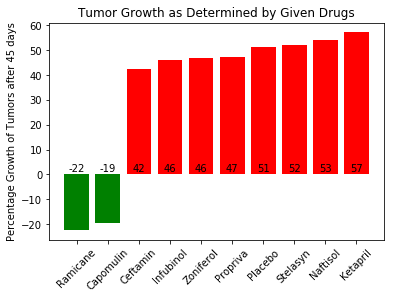

In [29]:
fig, ax = plt.subplots()
bar = plt.bar(np.arange(len(t_d_sort)),t_d_sort.values(),color=colors)
xloc = [value for value in np.arange(len(t_d_sort))]
plt.xticks(xloc,t_d_sort.keys(),rotation=45)
plt.title('Tumor Growth as Determined by Given Drugs')
plt.ylabel('Percentage Growth of Tumors after 45 days')
#autolabel(bar)
#help(plt.xticks)
autolabel(bar)

## Conclusions

* Ramicane and Capomulin are the most effective drugs to deal with tumors in this study. They were the only drugs that reduced tumor size and were significantly increased the survival rate compared to the placebo.
* The rest seem to be as affective as the placebo.  
* Infubinol and Stelasyn were possibly effective at reducing metastatic sites but that might be the result of a higher mortality rate than most other drugs